# An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.
## You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.
### Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation.
# Hence be very careful while providing campaign recommendation.


In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [339]:
df=pd.read_excel('Customer Churn Data.xlsx',sheet_name='Data for DSBA') # reading the data set 


In [340]:
df.head() #top 5 rows get displayed

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [341]:
df.tail() #last bottom 5 rows get displayed

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [342]:
df.dtypes #  data types of each individual column get printed


AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [343]:
df.isnull().sum() # checking each individual column that there are Null values or not|

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [344]:
df.duplicated().sum() #there no duplicated rows


0

In [345]:
df.drop(['AccountID','Payment','Gender','Marital_Status','cashback','Login_device'],axis=1,inplace=True) #dropping the unwanted column


In [346]:
df.drop(['coupon_used_for_payment'],axis=1,inplace=True) 


In [347]:
df.dtypes #  data types of each individual column get printed


Churn                     int64
Tenure                   object
City_Tier               float64
CC_Contacted_LY         float64
Service_Score           float64
Account_user_count       object
account_segment          object
CC_Agent_Score          float64
rev_per_month            object
Complain_ly             float64
rev_growth_yoy           object
Day_Since_CC_connect     object
dtype: object

In [348]:
# Identify object columns except for 'Column1'
object_columns = df.select_dtypes(include=['object']).columns.drop('account_segment')

# Convert object columns to float using pd.to_numeric()
df[object_columns] = df[object_columns].apply(pd.to_numeric, errors='coerce')

In [349]:
new_df = df
df['Churn'] = new_df['Churn'].astype(float) #converting int to float


In [350]:
df.dtypes 


Churn                   float64
Tenure                  float64
City_Tier               float64
CC_Contacted_LY         float64
Service_Score           float64
Account_user_count      float64
account_segment          object
CC_Agent_Score          float64
rev_per_month           float64
Complain_ly             float64
rev_growth_yoy          float64
Day_Since_CC_connect    float64
dtype: object

In [351]:
#df=df.apply(pd.to_numeric,errors='coerce')
#df['account_segment'] = df['account_segment'].fillna(df['account_segment'].mode().iloc[0])
#df['account_segment'] = df['account_segment'].fillna(0.0)
df=df.drop('account_segment', axis=1)
df = df.fillna(df.median()) #this is for numerical column


In [352]:
#now lets check again that there is null counts or not
df.isnull().sum() 

Churn                   0
Tenure                  0
City_Tier               0
CC_Contacted_LY         0
Service_Score           0
Account_user_count      0
CC_Agent_Score          0
rev_per_month           0
Complain_ly             0
rev_growth_yoy          0
Day_Since_CC_connect    0
dtype: int64

In [353]:
#now lets fill object column null values with mode
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].fillna(df[object_columns].mode().iloc[0] if not df[object_columns].empty else "")


In [354]:
#now lets check again that there is null counts or not
df.isnull().sum()

Churn                   0
Tenure                  0
City_Tier               0
CC_Contacted_LY         0
Service_Score           0
Account_user_count      0
CC_Agent_Score          0
rev_per_month           0
Complain_ly             0
rev_growth_yoy          0
Day_Since_CC_connect    0
dtype: int64

In [355]:
# Check unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Churn: [1. 0.]
Unique values in Tenure: [ 4.  0.  2. 13. 11.  9. 99. 19. 20. 14.  8. 26. 18.  5. 30.  7.  1. 23.
  3. 29.  6. 28. 24. 25. 16. 10. 15. 22. 27. 12. 21. 17. 50. 60. 31. 51.
 61.]
Unique values in City_Tier: [3. 1. 2.]
Unique values in CC_Contacted_LY: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41. 132.
  43. 129.]
Unique values in Service_Score: [3. 2. 1. 0. 4. 5.]
Unique values in Account_user_count: [3. 4. 5. 2. 1. 6.]
Unique values in CC_Agent_Score: [2. 3. 5. 4. 1.]
Unique values in rev_per_month: [  9.   7.   6.   8.   3.   2.   4.  10.   1.   5. 130.  19. 139. 102.
 120. 138. 127. 123. 124. 116.  21. 126. 134. 113. 114. 108. 140. 133.
 129. 107. 118.  11. 105.  20. 119. 121. 137. 110.  22. 101. 136. 125.
  14.  13.  12. 115.  23. 122. 117. 131. 104.  15.  25. 135. 111. 109.
 100. 103.]
Unique

In [356]:
df.sample(6) #this line will randomly select any five column from dataset

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,Day_Since_CC_connect
7311,1.0,0.0,1.0,19.0,3.0,5.0,5.0,4.0,1.0,11.0,7.0
8147,0.0,2.0,3.0,23.0,2.0,4.0,3.0,11.0,0.0,13.0,4.0
11177,0.0,3.0,1.0,15.0,3.0,4.0,5.0,5.0,0.0,14.0,3.0
11169,1.0,1.0,2.0,34.0,3.0,5.0,4.0,3.0,0.0,13.0,1.0
10062,0.0,2.0,1.0,18.0,4.0,4.0,1.0,6.0,0.0,26.0,5.0
10514,0.0,1.0,1.0,31.0,3.0,5.0,3.0,6.0,0.0,16.0,3.0


In [357]:
df.shape #{checking the number of rows and column}

(11260, 11)

In [358]:
df.info() #{ checking the dataypes and count of null values if present}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 11260 non-null  float64
 1   Tenure                11260 non-null  float64
 2   City_Tier             11260 non-null  float64
 3   CC_Contacted_LY       11260 non-null  float64
 4   Service_Score         11260 non-null  float64
 5   Account_user_count    11260 non-null  float64
 6   CC_Agent_Score        11260 non-null  float64
 7   rev_per_month         11260 non-null  float64
 8   Complain_ly           11260 non-null  float64
 9   rev_growth_yoy        11260 non-null  float64
 10  Day_Since_CC_connect  11260 non-null  float64
dtypes: float64(11)
memory usage: 967.8 KB


In [359]:
new_df['Churn'].value_counts() # Here it can be seen that the number of 1's is very less as compared to number of 0's. So that dataset is imbalanced dataset.


Churn
0.0    9364
1.0    1896
Name: count, dtype: int64

In [360]:
num_feature= [fea for fea in df.columns if df[fea].dtype !=object]
cat_feature= [fea for fea in df.columns if df[fea].dtype==object]

In [361]:
print("We have {} Numerical features : {}".format(len(num_feature),num_feature))
print()
print("We have {} Categorical features : {}".format(len(cat_feature),cat_feature))

We have 11 Numerical features : ['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'Day_Since_CC_connect']

We have 0 Categorical features : []


In [362]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11042.0,11.025086,12.879782,0.0,2.0,9.0,16.0,99.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,10816.0,3.692862,1.022976,1.0,3.0,4.0,4.0,6.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0
rev_per_month,10469.0,6.362594,11.909686,1.0,3.0,5.0,7.0,140.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.0,0.0,1.0,1.0
rev_growth_yoy,11257.0,16.193391,3.757721,4.0,13.0,15.0,19.0,28.0


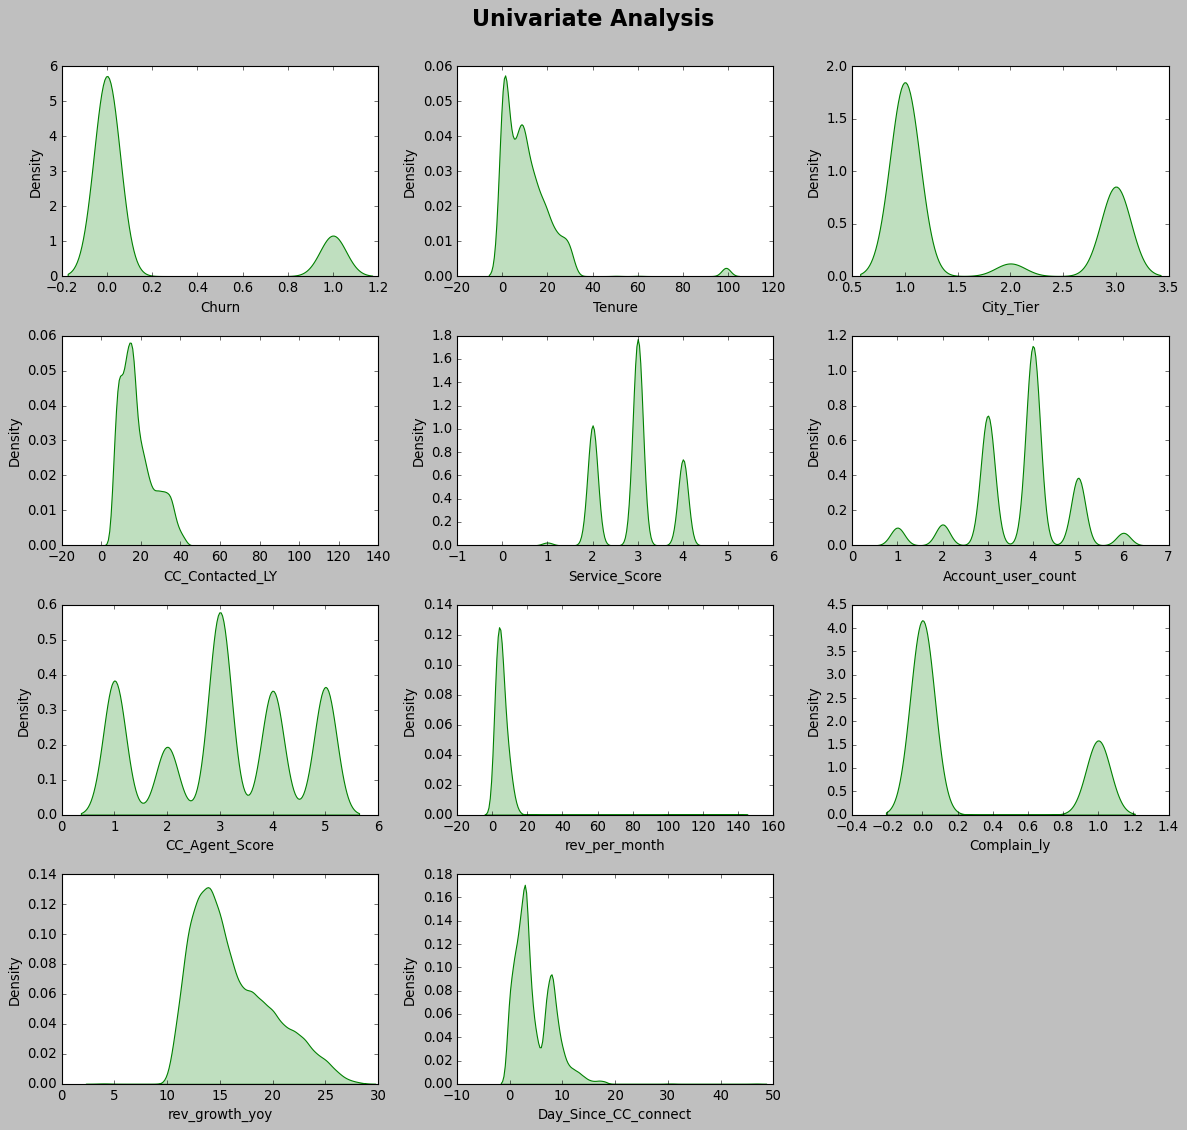

In [363]:
plt.figure(figsize=(15,17))
plt.suptitle('Univariate Analysis',fontsize=20,fontweight='bold',y=1)

for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[num_feature[i]],shade=True,color='g')
    plt.xlabel(num_feature[i])
    plt.tight_layout()

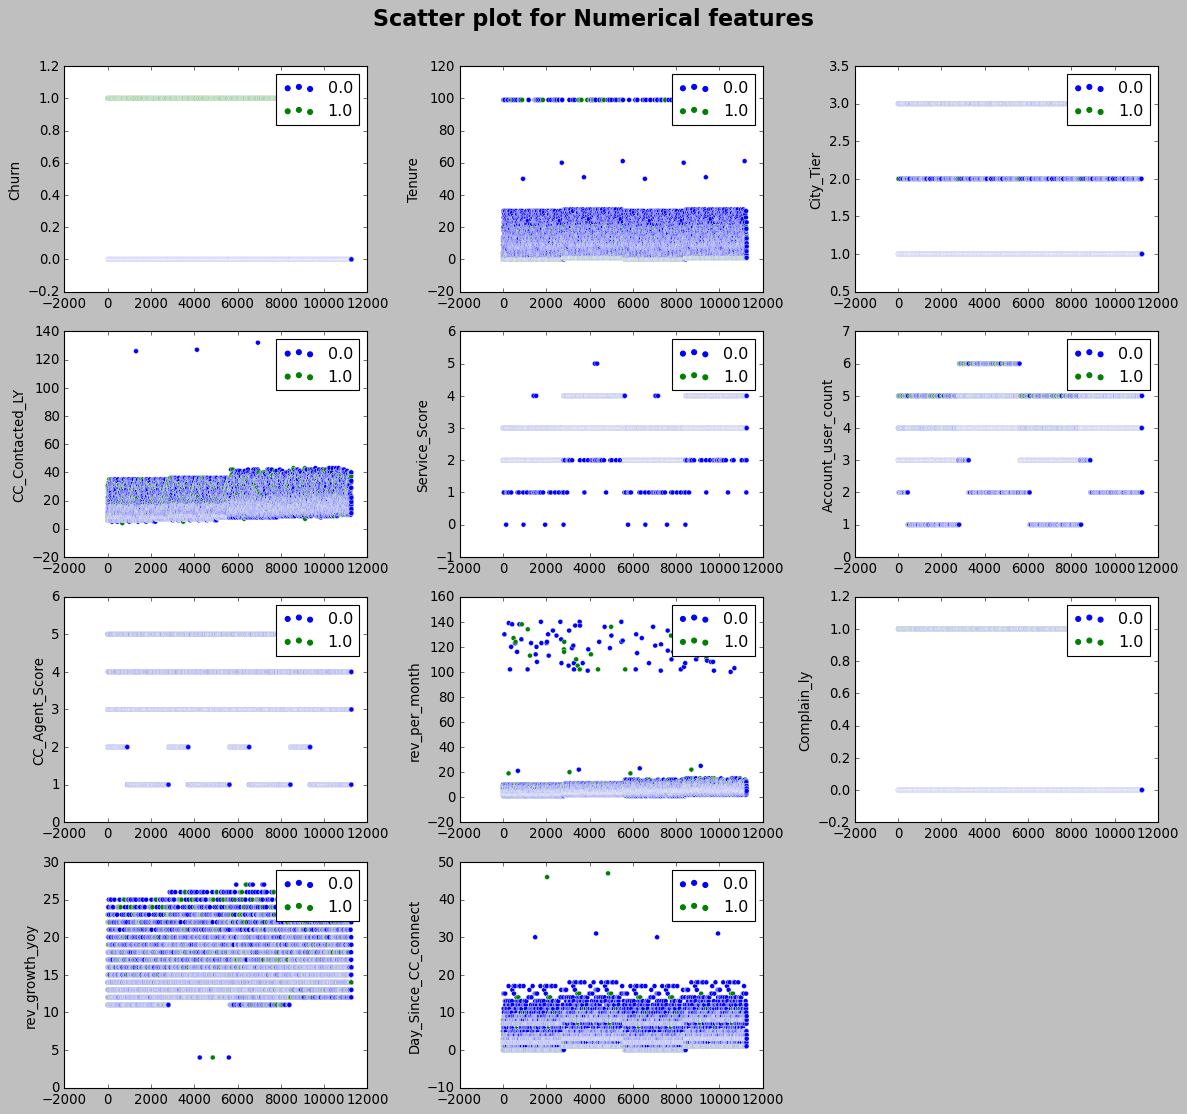

In [364]:
plt.figure(figsize=(15,17))  #fixing the  size of graph
plt.suptitle('Scatter plot for Numerical features',fontsize=20,fontweight='bold',y=1) # placing at top of the graph heading.
  
for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(y=num_feature[i],x=df.index,data=df,color='b',hue='Churn')
    plt.legend(loc="upper right")
    plt.tight_layout()

In [365]:
plt.figure(figsize=(20,40))
plt.suptitle('Count plot for Categorical features',fontsize=20,fontweight='bold',y=1)

for i in range(0,len(cat_feature)):
    plt.subplot(8,2,i+1)
    sns.countplot(y=cat_feature[i],data=df)
    plt.tight_layout()

<Figure size 1600x3200 with 0 Axes>

<Figure size 800x1600 with 0 Axes>

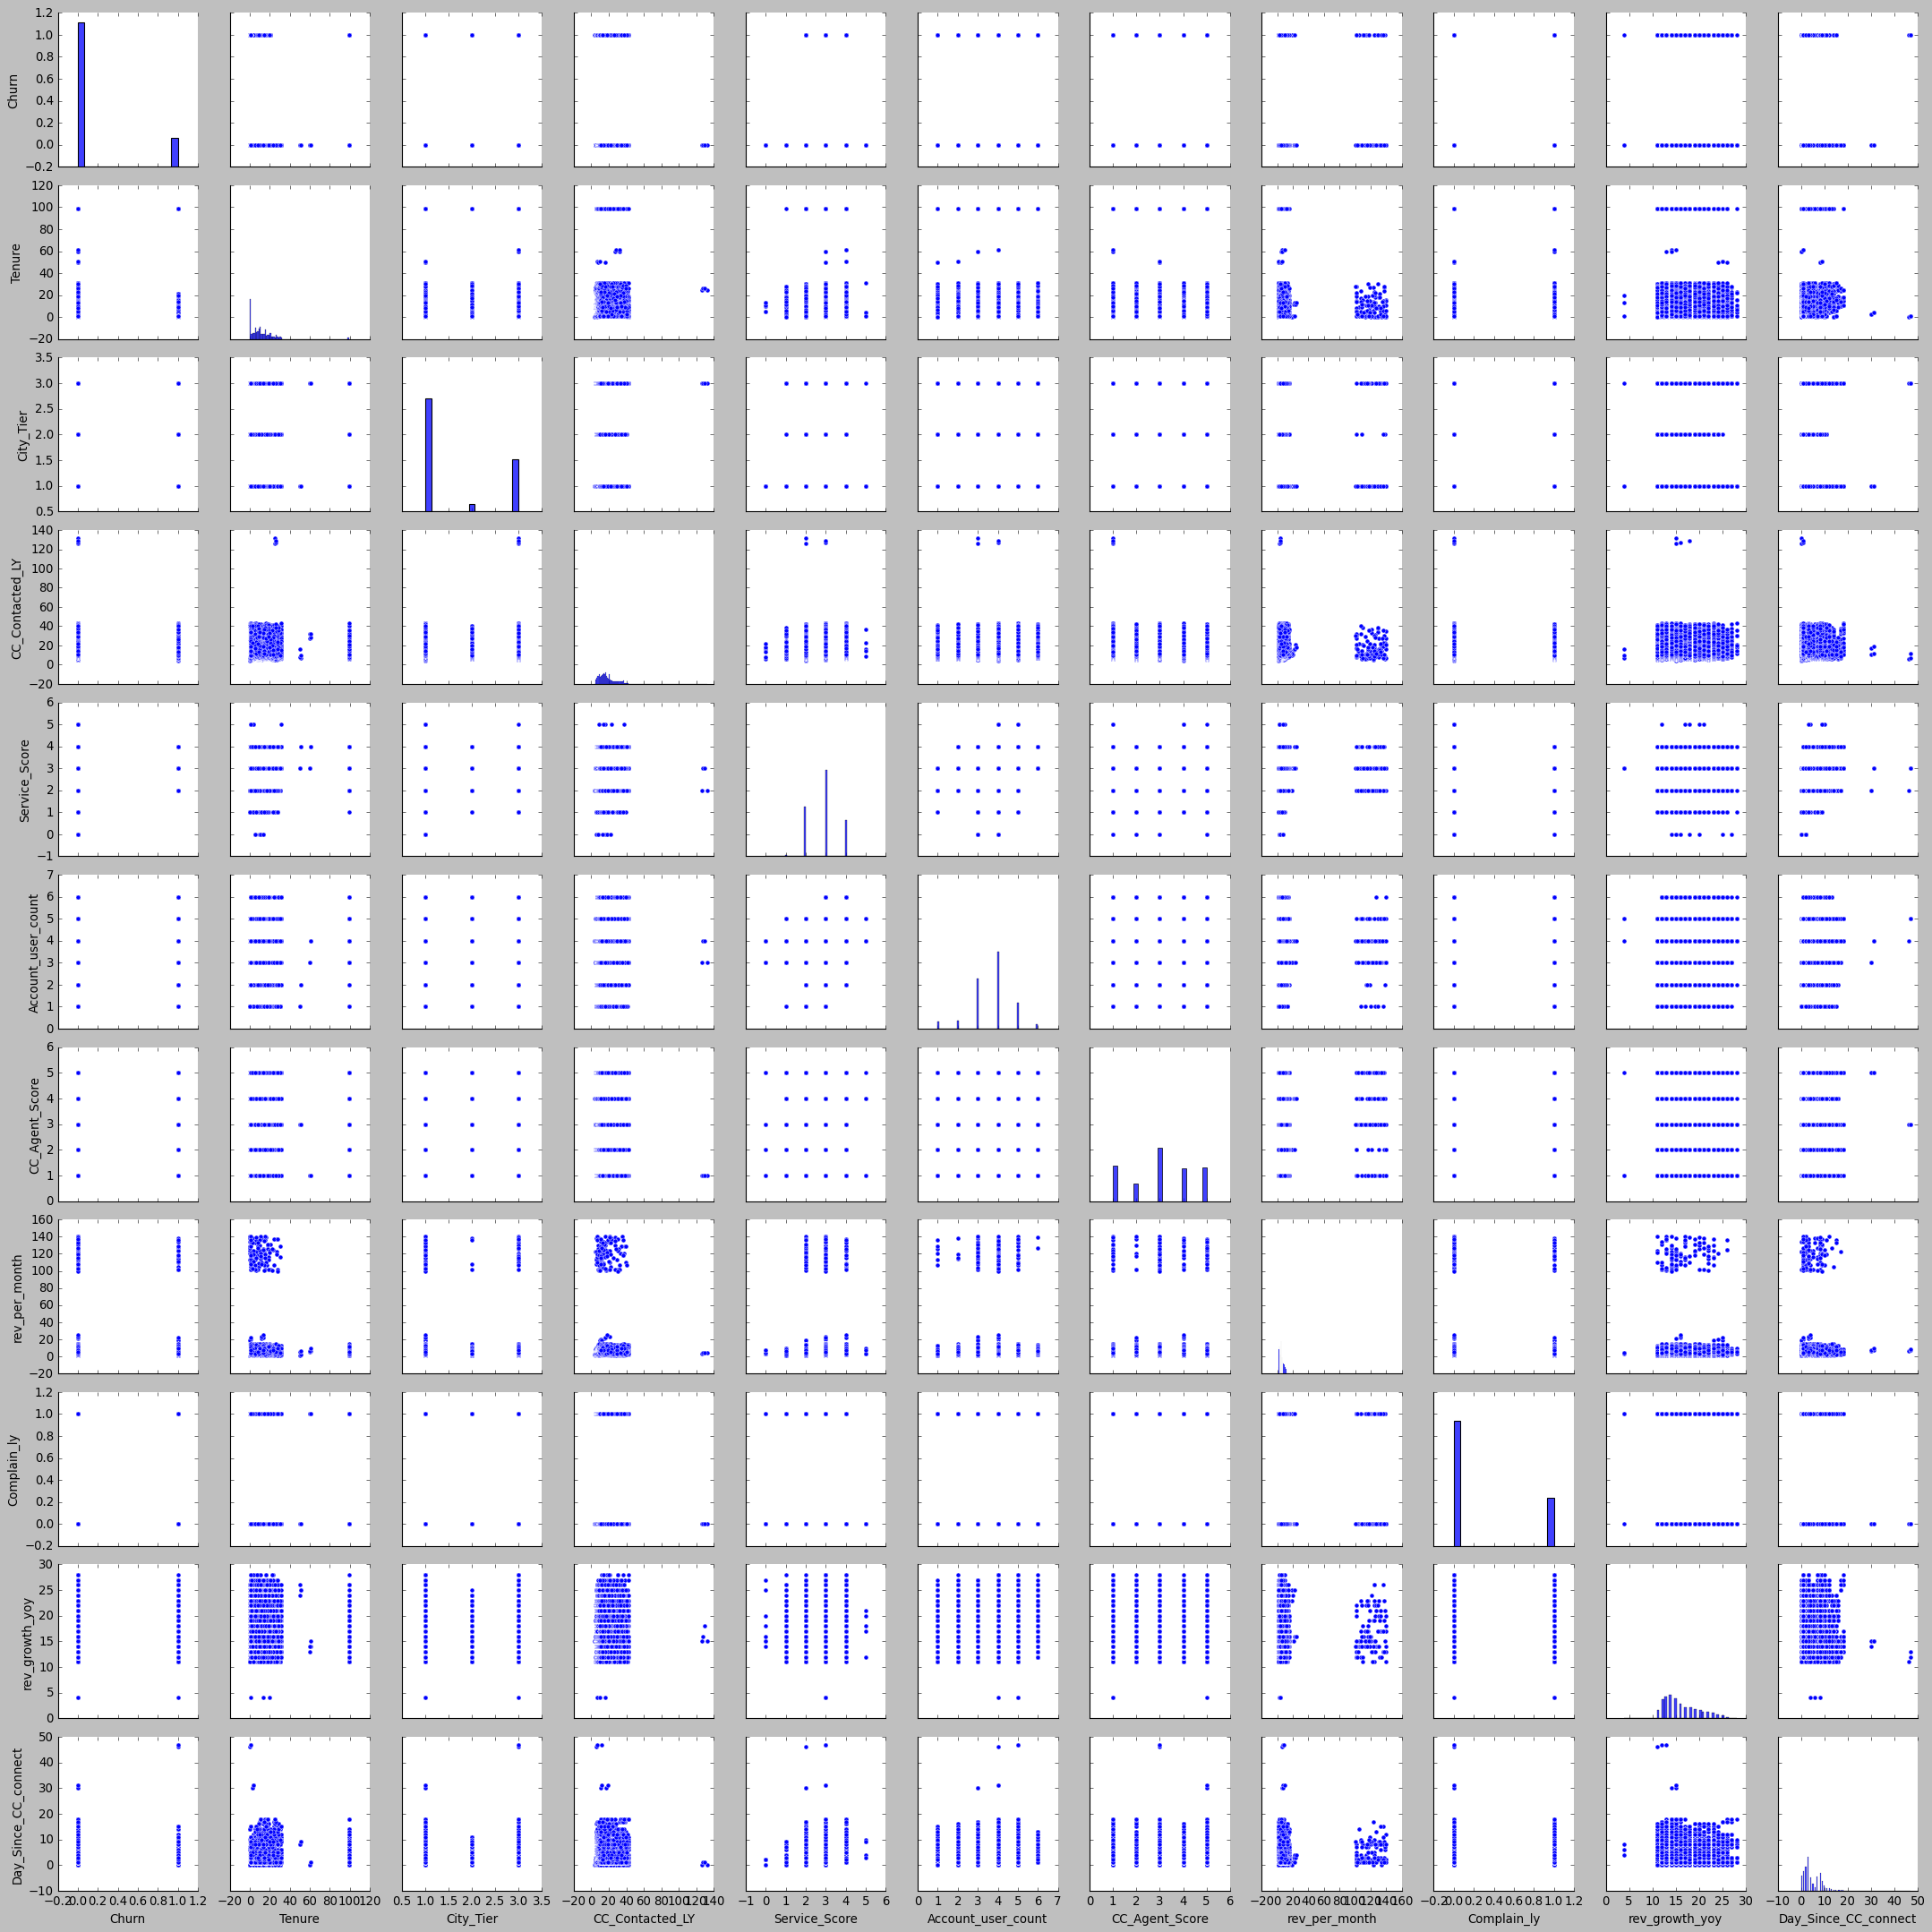

In [366]:
plt.figure(figsize=(10,20))
sns.pairplot(df)
plt.show()

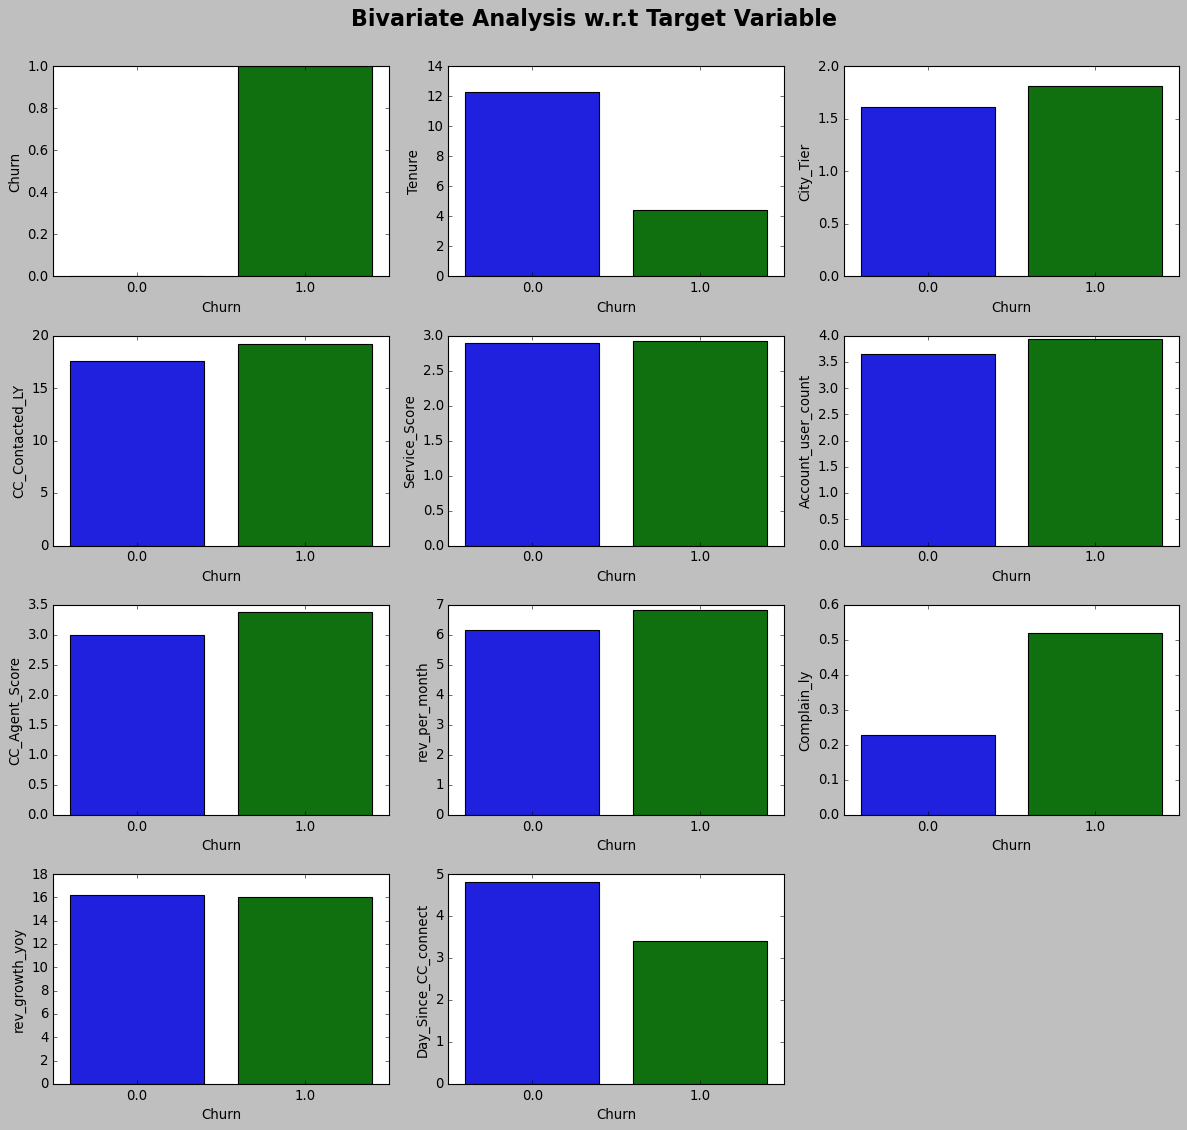

In [367]:
plt.figure(figsize=(15,17))
plt.suptitle('Bivariate Analysis w.r.t Target Variable',fontsize=20,fontweight='bold',y=1)

for i in range(0,len(num_feature)):
    plt.subplot(5,3,i+1)
    sns.barplot(y=num_feature[i],x='Churn',data=df,ci=0)
    plt.tight_layout()

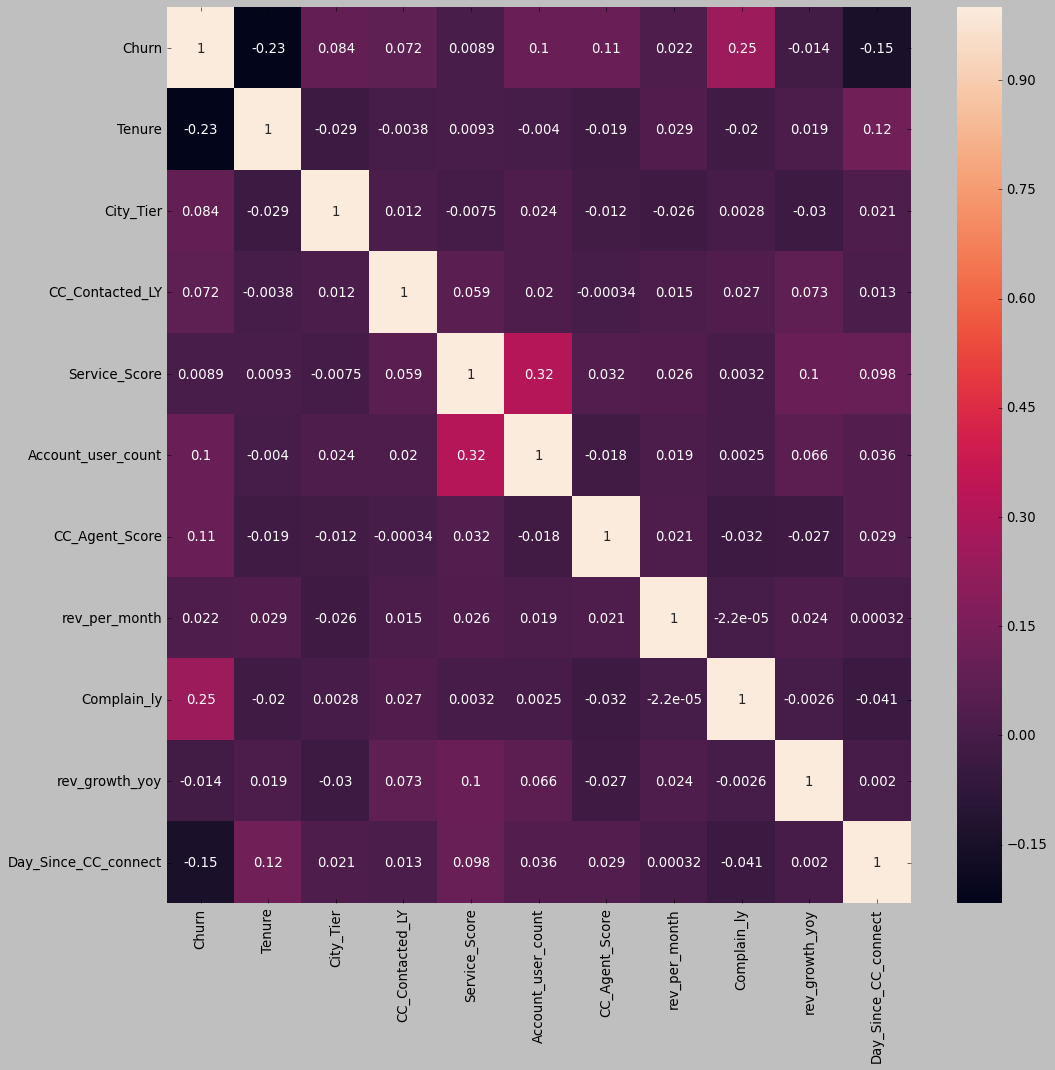

In [368]:
plt.figure(figsize=(15,14))
sns.heatmap(df.corr(),annot=True)
plt.show()

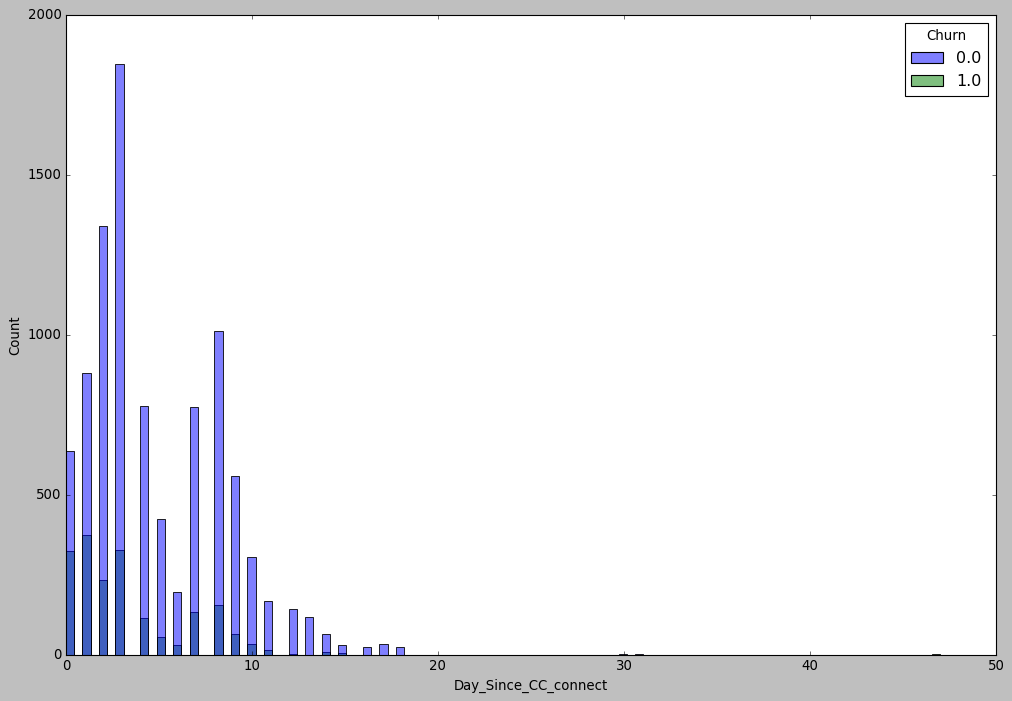

In [369]:
plt.figure(figsize=(15,10))
sns.histplot(x='Day_Since_CC_connect',hue='Churn',data=df)
plt.show()

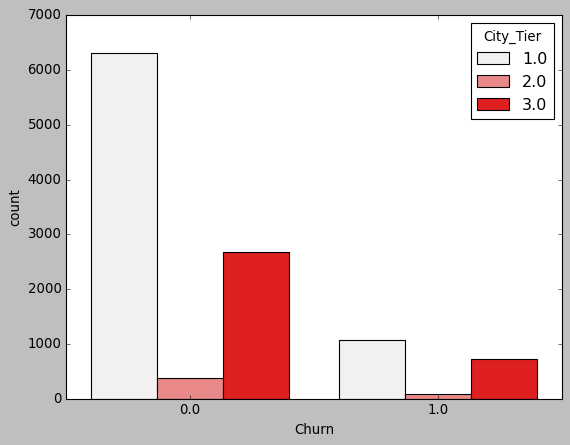

In [370]:
sns.countplot(x=df.Churn,hue=df.City_Tier,color='red')
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

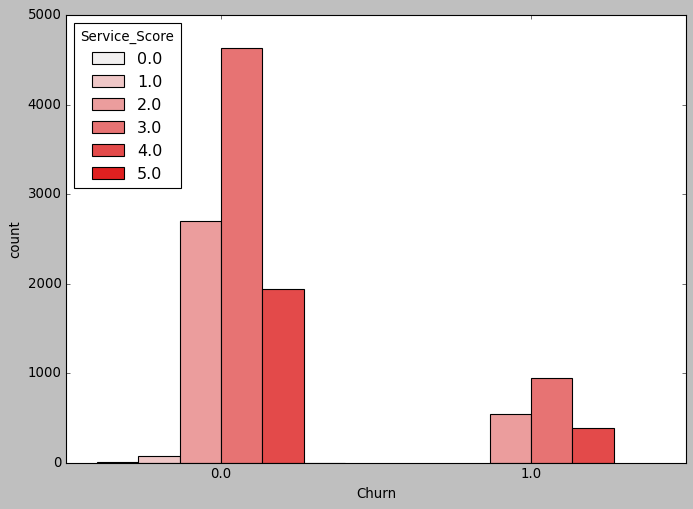

In [371]:
plt.figure(figsize=(10,7))
sns.countplot(x='Churn',hue='Service_Score',data=df,color='red')

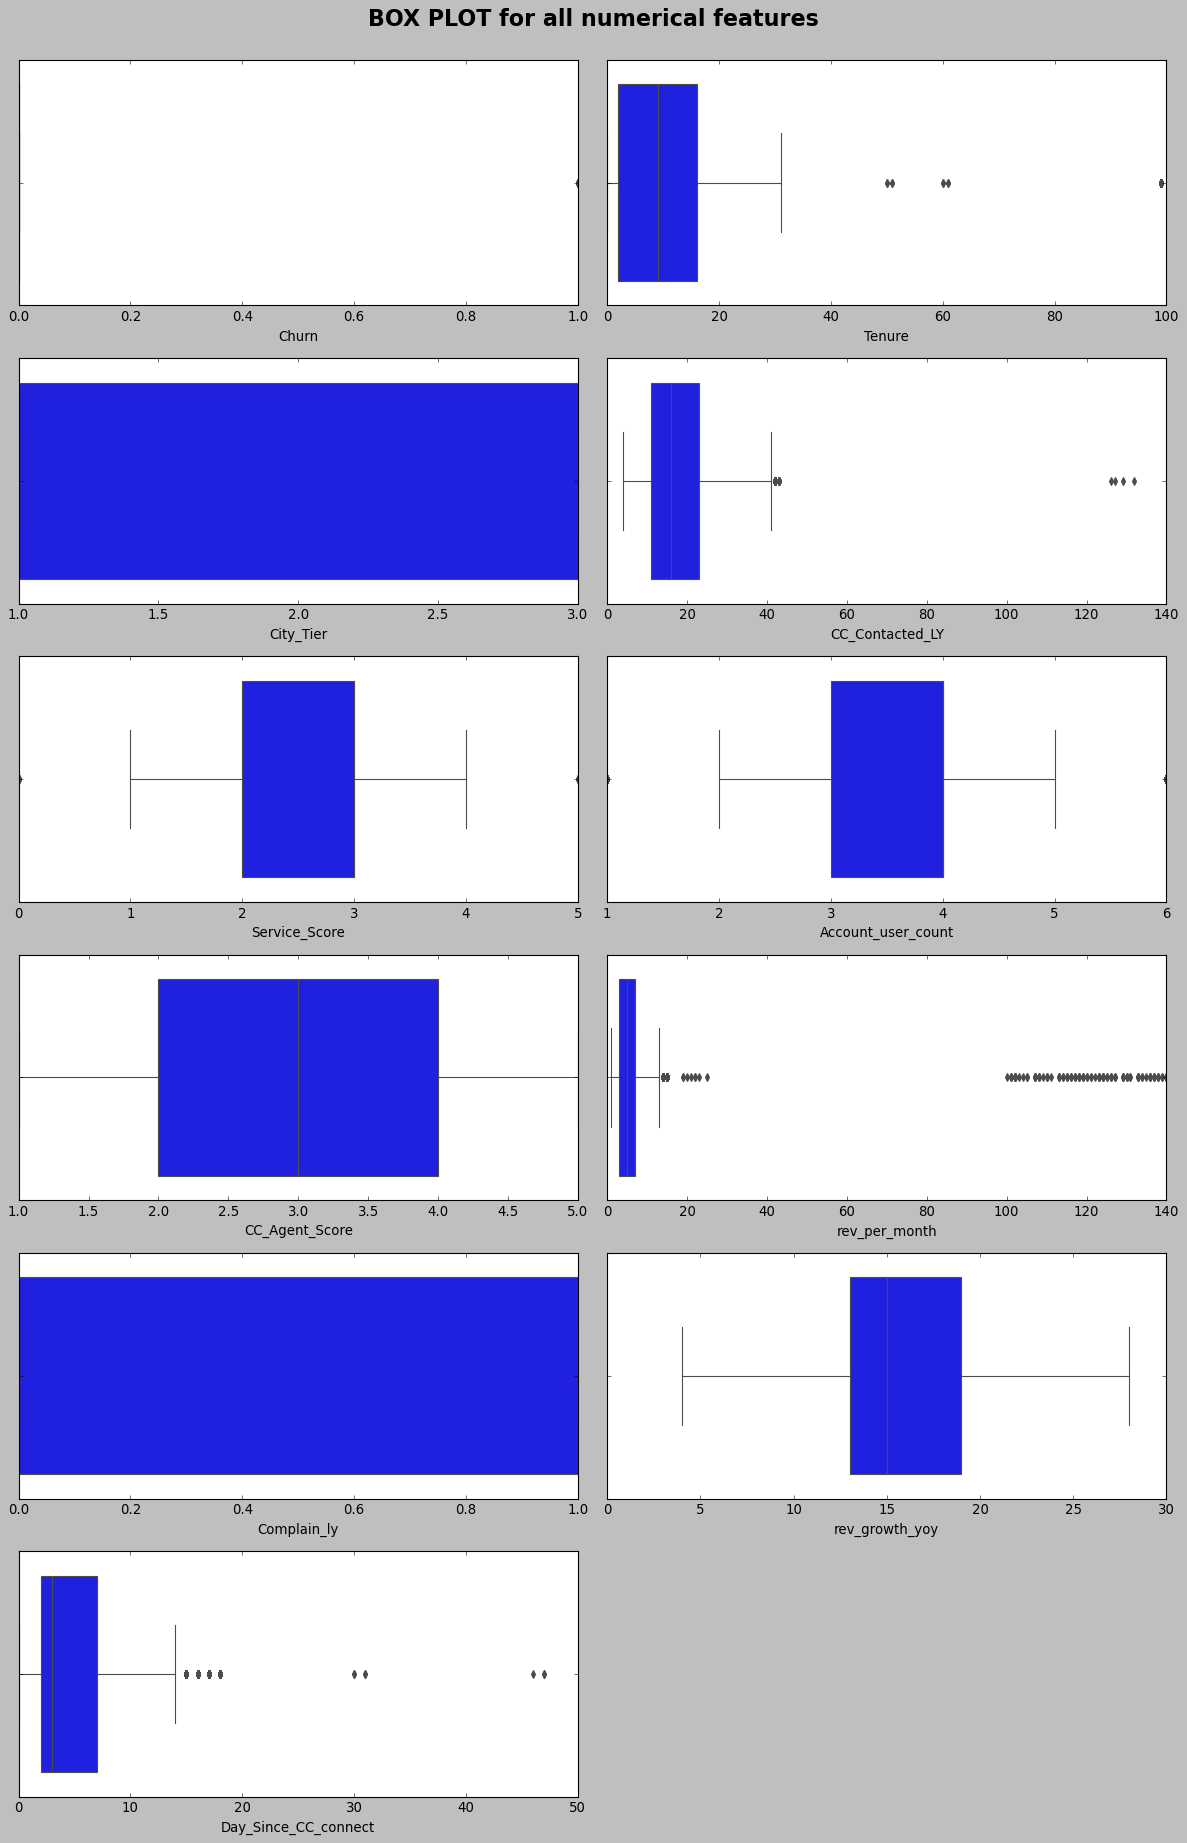

In [372]:
plt.figure(figsize=(15, 30))
plt.suptitle('BOX PLOT for all numerical features', fontsize=20, fontweight='bold', y=1)

for i, feature in enumerate(num_feature):
    plt.subplot(8, 2, i + 1)
    sns.boxplot(data=df, x=feature, orient='h')  # Plot boxplot for each numerical feature
    plt.tight_layout()


In [373]:
df.head() #checking top 5 rows of the data set

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,Day_Since_CC_connect
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,5.0
1,1.0,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0
2,1.0,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,3.0
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,3.0
4,1.0,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,3.0


In [374]:
#Now doing one_hot_encoding to convert categorical features into numerical feature
df1=pd.get_dummies(data=new_df,columns=['account_segment'],drop_first=True)


In [375]:
df1.head()


,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,Day_Since_CC_connect,account_segment_Regular,account_segment_Regular +,account_segment_Regular Plus,account_segment_Super,account_segment_Super +,account_segment_Super Plus
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,5.0,False,False,False,True,False,False
1,1.0,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,False,False,True,False,False,False
2,1.0,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,3.0,False,False,True,False,False,False
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,3.0,False,False,False,True,False,False
4,1.0,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,3.0,False,False,True,False,False,False


In [376]:
X=df1.drop(['Churn'],axis=1) #dropping the  label
Y=df1['Churn']
X.shape,Y.shape #checking shape

((11260, 16), (11260,))

In [377]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,Day_Since_CC_connect,account_segment_Regular,account_segment_Regular +,account_segment_Regular Plus,account_segment_Super,account_segment_Super +,account_segment_Super Plus
0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,5.0,False,False,False,True,False,False
1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,False,False,True,False,False,False
2,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,3.0,False,False,True,False,False,False
3,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,3.0,False,False,False,True,False,False
4,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,3.0,False,False,True,False,False,False


In [378]:
type(X)

pandas.core.frame.DataFrame

In [379]:
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Churn, dtype: float64

In [380]:
from imblearn.combine import SMOTETomek
X = X.fillna(0.0)
Y = Y.fillna(0.0)
smk=SMOTETomek()
X = pd.DataFrame(np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0))
Y = pd.DataFrame(np.nan_to_num(Y, nan=0.0, posinf=0.0, neginf=0.0))
X_res,Y_res=smk.fit_resample(X,Y)
%matplotlib inline

In [381]:
type(X)

pandas.core.frame.DataFrame

In [382]:
X_res.shape,Y_res.shape #after balancing the data set checking new shape

((18722, 16), (18722, 1))

In [383]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.2,random_state=0)

In [384]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [385]:
X_train

array([[-0.08724907, -0.75651281, -0.24871862, ..., -0.67138048,
        -0.04863855, -0.22810904],
       [-0.62927958,  1.40773208, -0.88885862, ..., -0.67138048,
        -0.04863855, -0.22810904],
       [ 0.84194609, -0.75651281, -1.14626387, ..., -0.67138048,
        -0.04863855,  4.45078325],
       ...,
       [ 0.22248265, -0.75651281, -0.58529809, ...,  1.55929265,
        -0.04863855, -0.22810904],
       [-0.31954786,  1.40773208,  0.08786085, ...,  1.55929265,
        -0.04863855, -0.22810904],
       [-0.24211493, -0.75651281, -2.04380912, ...,  1.55929265,
        -0.04863855, -0.22810904]])

In [386]:
X_test

array([[-0.62927958, -0.75651281,  1.3187898 , ..., -0.67138048,
        -0.04863855, -0.22810904],
       [-0.55184665, -0.75651281, -0.69749124, ..., -0.67138048,
        -0.04863855, -0.22810904],
       [ 1.22911073, -0.75651281, -0.02433231, ..., -0.67138048,
        -0.04863855, -0.22810904],
       ...,
       [ 0.22248265, -0.75651281, -1.03407071, ..., -0.67138048,
        -0.04863855, -0.22810904],
       [-0.62927958, -0.75651281, -1.14626387, ..., -0.67138048,
        -0.04863855, -0.22810904],
       [-0.55184665, -0.75651281,  0.08786085, ..., -0.67138048,
        -0.04863855, -0.22810904]])

In [387]:
type(X_test)

numpy.ndarray

In [388]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape


((14977, 16), (3745, 16), (14977, 1), (3745, 1))

In [389]:
Y_test.value_counts(normalize=True)*100

1.0    50.814419
0.0    49.185581
Name: proportion, dtype: float64

In [390]:
Y_train.value_counts(normalize=True)*100

0.0    50.203646
1.0    49.796354
Name: proportion, dtype: float64

In [391]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
Y_predict=model.predict(X_test)
type(model)

sklearn.linear_model._logistic.LogisticRegression

In [392]:
model_score=model.score(X_test,Y_test)
print('Accuracy score is',model_score*100)

Accuracy score is 79.06542056074767


In [393]:
print("confusion metrics",'n',metrics.confusion_matrix(Y_test,Y_predict),'\n')
print()

confusion metrics n [[1436  406]
 [ 378 1525]] 




In [394]:
!pip install --upgrade scikit-learn


In [395]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics


In [396]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10],#[10,20,30,50]#[3,5,7,9]
    'min_samples_leaf': [250],#[100,150,200,250]# 1-3% 50-150
    'min_samples_split': [750]#[150,300,450,600,750] # 150 - 450
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [397]:
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 250, 'min_samples_split': 750}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 250, 'min_samples_split': 750}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=250,
                       min_samples_split=750)

In [398]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)


In [399]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.000000,1.000000
1,0.559353,0.440647
2,0.933594,0.066406
3,0.837651,0.162349
4,0.493827,0.506173


In [400]:
confusion_matrix(Y_train, ytrain_predict)

array([[6563,  956],
       [1409, 6049]])

In [401]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,Y_train) 
cart_train_acc

0.8420912065166589

In [402]:
print(classification_report(Y_train, ytrain_predict))


              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85      7519
         1.0       0.86      0.81      0.84      7458

    accuracy                           0.84     14977
   macro avg       0.84      0.84      0.84     14977
weighted avg       0.84      0.84      0.84     14977



In [403]:
cart_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
cf1=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(cf1.loc["1.0"][0],2)
cart_train_recall=round(cf1.loc["1.0"][1],2)
cart_train_f1=round(cf1.loc["1.0"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)


cart_train_precision  0.86
cart_train_recall  0.81
cart_train_f1  0.84


In [404]:
confusion_matrix(Y_test, ytest_predict)

array([[1608,  234],
       [ 372, 1531]])

In [405]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,Y_test)
cart_test_acc

0.8381842456608811

In [406]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      1842
         1.0       0.87      0.80      0.83      1903

    accuracy                           0.84      3745
   macro avg       0.84      0.84      0.84      3745
weighted avg       0.84      0.84      0.84      3745



In [407]:
cart_metrics=classification_report(Y_test, ytest_predict,output_dict=True)
cf1=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(cf1.loc["1.0"][0],2)
cart_test_recall=round(cf1.loc["1.0"][1],2)
cart_test_f1=round(cf1.loc["1.0"][2],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.87
cart_train_recall  0.8
cart_train_f1  0.83


In [408]:
param_grid = {#put a grid for hyperparameters
    'max_depth': [8,9],
    'max_features': [8,9],#[5,4,6],
    'min_samples_leaf': [250,150],
    'min_samples_split': [750,500],
    'n_estimators': [100,150]#150,250
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [409]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9], 'max_features': [8, 9],
                         'min_samples_leaf': [250, 150],
                         'min_samples_split': [750, 500],
                         'n_estimators': [100, 150]})

In [410]:
param_grid

{'max_depth': [8, 9],
 'max_features': [8, 9],
 'min_samples_leaf': [250, 150],
 'min_samples_split': [750, 500],
 'n_estimators': [100, 150]}

In [411]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': 8,
 'min_samples_leaf': 150,
 'min_samples_split': 500,
 'n_estimators': 150}

In [412]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=9, max_features=8, min_samples_leaf=150,
                       min_samples_split=500, n_estimators=150)

In [413]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [414]:
confusion_matrix(Y_train,ytrain_predict)

array([[6444, 1075],
       [1041, 6417]])

In [415]:
rf_train_acc=best_grid.score(X_train,Y_train) 
rf_train_acc

0.8587166989383722

In [416]:
print(classification_report(Y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      7519
         1.0       0.86      0.86      0.86      7458

    accuracy                           0.86     14977
   macro avg       0.86      0.86      0.86     14977
weighted avg       0.86      0.86      0.86     14977



In [417]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [418]:
rf_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
cf1=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(cf1.loc["1.0"][0],2)
rf_train_recall=round(cf1.loc["1.0"][1],2)
rf_train_f1=round(cf1.loc["1.0"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.86
rf_train_recall  0.86
rf_train_f1  0.86


Area under Curve is 0.8587236014700009


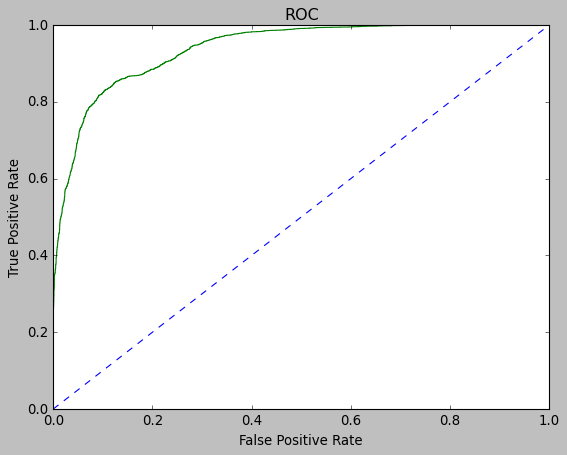

In [419]:
rf_train_fpr, rf_train_tpr,_=roc_curve(Y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(Y_train,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

In [420]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [421]:
param_grid = {
    'hidden_layer_sizes': [64,128],#[32,64,128], #Multiple layers(200,120) 
    'max_iter': [100,200,300],
    'solver': ['adam','sgd'], #sgd
}

nncl = MLPClassifier(tol = 0.01)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [422]:
grid_search.fit(X_train_scaled, Y_train)
grid_search.best_params_
#{'hidden_layer_sizes': 32, 'max_iter': 200, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 128, 'max_iter': 100, 'solver': 'adam'}

In [423]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=128, max_iter=100, tol=0.01)

In [424]:
ytrain_predict = best_grid.predict(X_train_scaled)
ytest_predict = best_grid.predict(X_test_scaled)

In [425]:
confusion_matrix(Y_train,ytrain_predict)

array([[6500, 1019],
       [ 866, 6592]])

In [426]:
nn_train_acc=best_grid.score(X_train_scaled,Y_train)
nn_train_acc

0.8741403485344195

In [427]:
print(classification_report(Y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      7519
         1.0       0.87      0.88      0.87      7458

    accuracy                           0.87     14977
   macro avg       0.87      0.87      0.87     14977
weighted avg       0.87      0.87      0.87     14977



In [428]:
nn_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
cf1=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(cf1.loc["1.0"][0],2)
nn_train_recall=round(cf1.loc["1.0"][1],2)
nn_train_f1=round(cf1.loc["1.0"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.87
nn_train_recall  0.88
nn_train_f1  0.87


Area under Curve is 0.8741798688517738


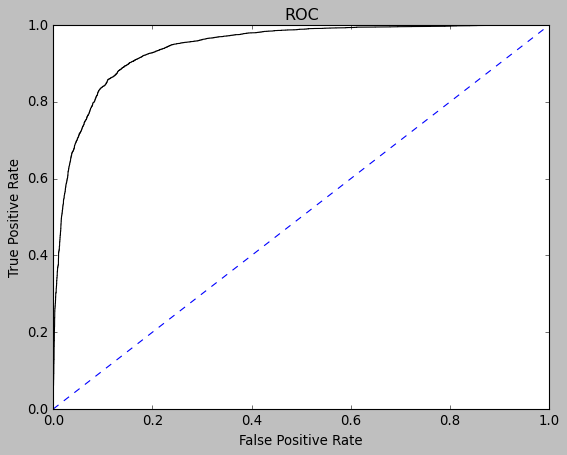

In [429]:
nn_train_fpr, nn_train_tpr,_=roc_curve(Y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(Y_train,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

In [430]:
confusion_matrix(Y_test,ytest_predict)

array([[1598,  244],
       [ 245, 1658]])

In [431]:
nn_test_acc=best_grid.score(X_test_scaled,Y_test)
nn_test_acc

0.8694259012016021

In [432]:

print(classification_report(Y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1842
         1.0       0.87      0.87      0.87      1903

    accuracy                           0.87      3745
   macro avg       0.87      0.87      0.87      3745
weighted avg       0.87      0.87      0.87      3745



In [433]:
nn_metrics=classification_report(Y_test, ytest_predict,output_dict=True)
cf1=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(cf1.loc["1.0"][0],2)
nn_test_recall=round(cf1.loc["1.0"][1],2)
nn_test_f1=round(cf1.loc["1.0"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.87
nn_test_recall  0.87
nn_test_f1  0.87


Area under Curve is 0.8693955997245334


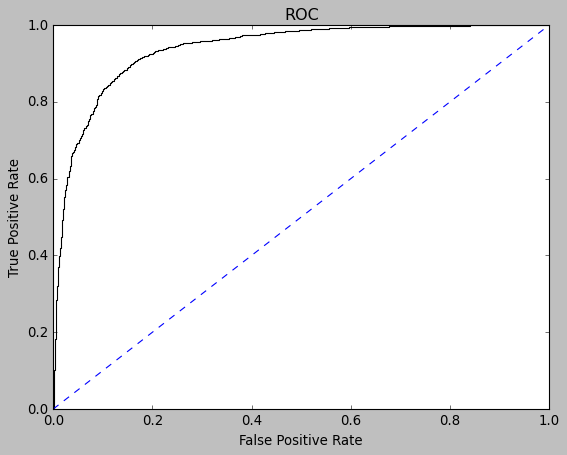

In [434]:
nn_test_fpr, nn_test_tpr,_=roc_curve(Y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(Y_test,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [435]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=128, max_iter=100, tol=0.01)>

### Based on the provided output from the dataset, here is an interpretation of the accuracy scores for different models:
1. Decision Tree (CART) Model:
- Train Data Accuracy: The decision tree model achieved a training accuracy of approximately 86.96% (0.8696). This indicates that the model correctly predicted the churn outcome for about 86.96% of the training data.
2. Random Forest Model:
##### - Train Data Accuracy: The random forest model achieved a training accuracy of around 85.76% (0.8576). This suggests that the model correctly predicted the churn outcome for approximately 85.76% of the training data.
3. Neural Network Model:
- Train Data Accuracy: The neural network model achieved a training accuracy of approximately 87.73% (0.8773). This indicates that the model correctly predicted the churn outcome for around 87.73% of the training data.
- Test Data Accuracy: The neural network model achieved a test accuracy of approximately 87.54% (0.8754). This suggests that the model correctly predicted the churn outcome for approximately 87.54% of the test data.
Based on these results, the neural network model seems to have the highest accuracy both on the training and test data, indicating its better performance compared to the decision tree and random forest models. However, it is important to consider other factors such as model complexity, interpretability, and potential overfitting when selecting the best model for your specific churn prediction task.
 